# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [165]:
# Breast Cancer Wisconsin (PMLB copy) dataset
breast_cancer = pd.read_csv("https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/_deprecated_breast_cancer_wisconsin/_deprecated_breast_cancer_wisconsin.tsv.gz", sep="\t")

# Rename columns for easier access
breast_cancer = breast_cancer.rename(columns={"target": "target", "2": "radius1", "3": "texture1", "4": "perimeter1", "5": "area1", "6": "smoothness1", "7": "compactness1", "8": "concavity1", "9": "concave_points1", "10": "symmetry1", "11": "fractal_dimension1", "12": "radius2", "13": "texture2", "14": "perimeter2", "15": "area2", "16": "smoothness2", "17": "compactness2", "18": "concavity2", "19": "concave_points2", "20": "symmetry2", "21": "fractal_dimension2", "22": "radius3", "23": "texture3", "24": "perimeter3", "25": "area3", "26": "smoothness3", "27": "compactness3", "28": "concavity3", "29": "concave_points3", "30": "symmetry3", "31": "fractal_dimension3"})

# Random sample of 10 rows
breast_cancer_sample = breast_cancer.sample(10)
print("Random Sample of 10 Rows:\n", breast_cancer_sample)

Random Sample of 10 Rows:
      target  radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
336       0   12.990     14.23       84.08   514.3      0.09462       0.09965   
42        1   19.070     24.81      128.30  1104.0      0.09081       0.21900   
450       0   11.870     21.54       76.83   432.0      0.06613       0.10640   
205       1   15.120     16.68       98.78   716.6      0.08876       0.09588   
545       0   13.620     23.23       87.19   573.2      0.09246       0.06747   
380       0   11.270     12.96       73.16   386.3      0.12370       0.11110   
172       1   15.460     11.89      102.50   736.9      0.12570       0.15550   
152       0    9.731     15.34       63.78   300.2      0.10720       0.15990   
543       0   13.210     28.06       84.88   538.4      0.08671       0.06877   
148       0   14.440     15.18       93.97   640.1      0.09970       0.10210   

     concavity1  concave_points1  symmetry1  ...  radius3  texture3  \
336     0.

YOUR ANSWERS HERE

### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [166]:
# List all Breast Cancer Wisconsin (PMLB copy) features
breast_cancer_cols = breast_cancer.columns.to_list()
print("Column Names:\n", breast_cancer_cols)

# Explanation of each feature (first 10 columns):
breast_cancer.info()
breast_cancer.describe()
# There are 31 columns in total--1 target column (categorical)and 30 feature columns (continuous).
# There are no missing values in this dataset as there 569 entries total, and each column has 569 non-null values.
# According to the UC Irvine Machine Learning Repository, the first column, "target", is the diagnosis column, which is categorical and indicates whether the tumor is malignant or benign.
# The second column, "2", is the radius1 column, which is continuous and measures the "mean of distances from center to points on the perimeter."
# The third column, "3", is the texture1 column, which is continuous and measures the "standard deviation of gray-scale values."
# The fourth column, "4", is the perimiter1 column, which is continuous and represents the "perimeter" of the tumor.
# The fifth column, "5", is the area1 column, which is continuous and represents the "area" of the tumor.
# The sixth column, "6", is the smoothness1 column, which is continuous and measures the "local variation in radius lengths."
# The seventh column, "7", is the compactness1 column, which is continuous and measures "perimeter^2 / area - 1.0."
# The eighth column, "8", is the concavity1 column, which is continuous and measures the "severity of concave portions of the contour."
# The ninth column, "9", is the concave_points1 column, which is continuous and measures the "number of concave portions of the contour."
# Finally, the tenth column, "10", is the symmetry1 column, which is continuous and measures the "symmetry" of the tumor.
# The remaining columns (11-31) share similar features that are calculated based on different aspects of the tumor.

Column Names:
 ['target', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   target              569 non-null    int64  
 1   radius1             569 non-null    float64
 2   texture1            569 non-null    float64
 3   perimeter1          569 non-null    float64
 4   area1               569 non-null    float64
 5   smoothness1         569 non-null    float64
 6   compactness1        569 non-null    f

,target,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


YOUR ANSWERS HERE

### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

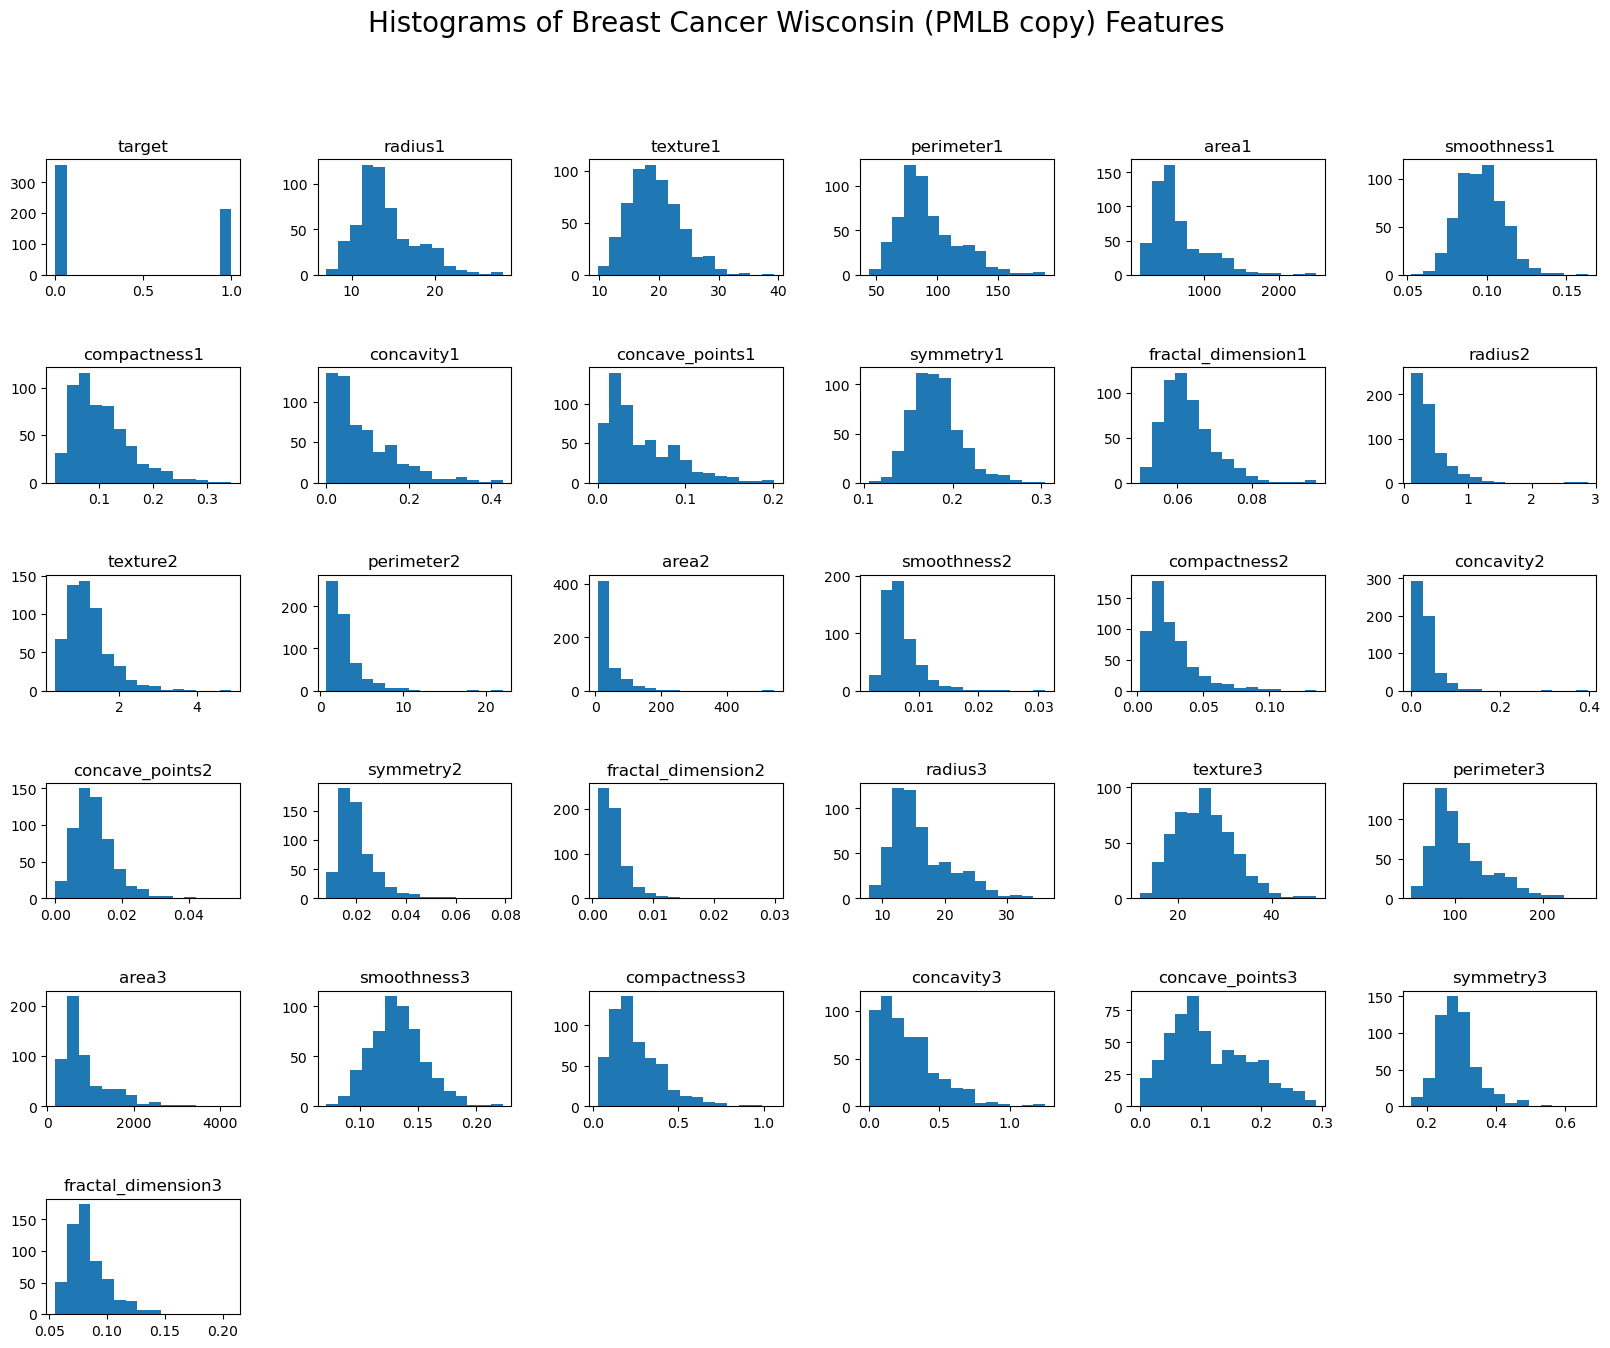

In [196]:
# Create histogram for each column in dataset
breast_cancer.hist(grid=False, bins=15, figsize=(20, 15)) # turn off grid view 

# Adjust spacing between plots
plt.subplots_adjust(hspace=0.8, wspace=0.4) 

# Add title and labels
plt.suptitle("Histograms of Breast Cancer Wisconsin (PMLB copy) Features", fontsize=20)
plt.show()

# Explanation of distributions (first 10 columns):
# The distribution that best matches the first column, "target", is bimodal given the two separated peaks.
# The distribution that best matches the second column, "radius1", is skewed to the right.
# The distribution that best matches the third column, "texture1", is normal.
# The distribution that best matches the fourth column, "perimeter1", is skewed to the right.
# The distribution that best matches the fifth column, "area1", is skewed to the right.
# The distribution that best matches the sixth column, "smoothness1", is normal.
# The distribution that best matches the seventh column, "compactness1", is skewed to the right.
# The distribution that best matches the eighth column, "concavity1", is exponential.
# The distribution that best matches the ninth column, "concave_points1", is skewed to the right.
# Finally, the distribution that best matches the tenth column, "symmetry1", is also normal.

YOUR ANSWERS HERE

### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

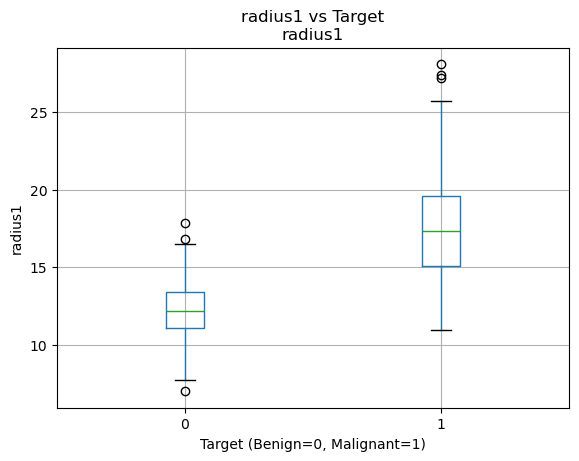

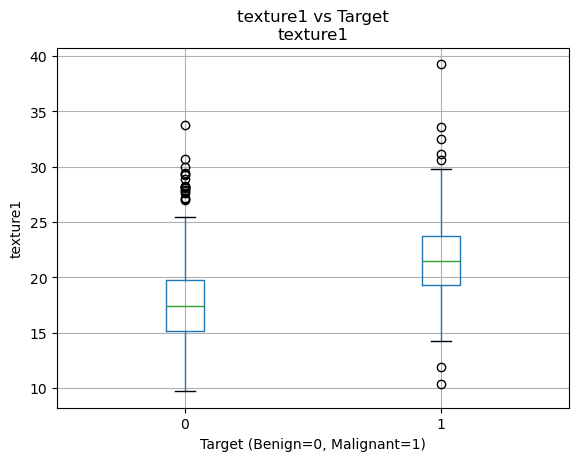

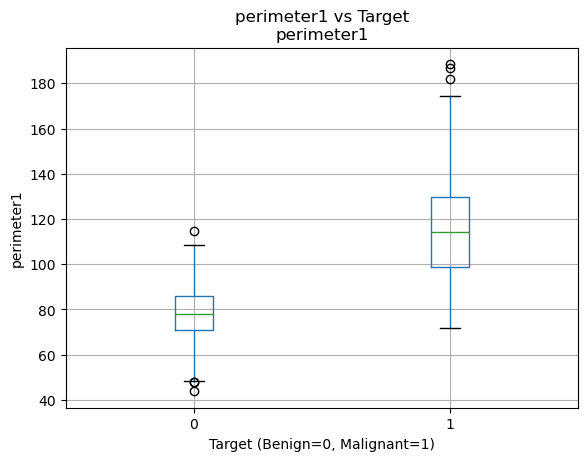

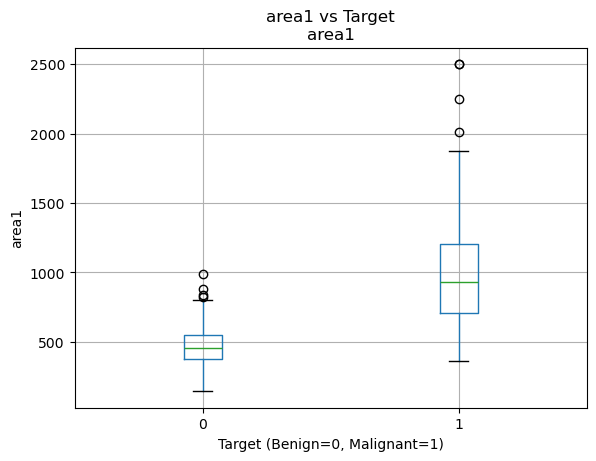

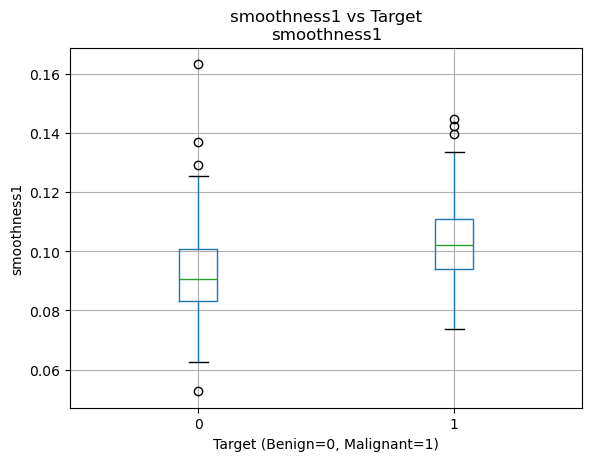

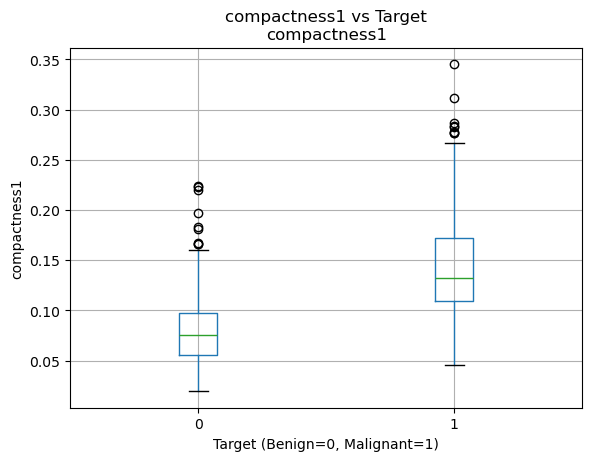

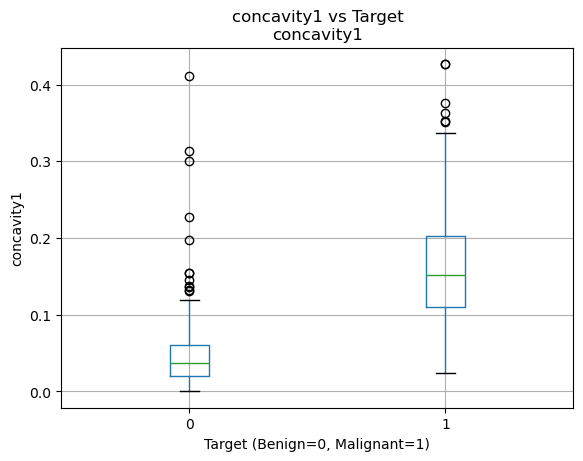

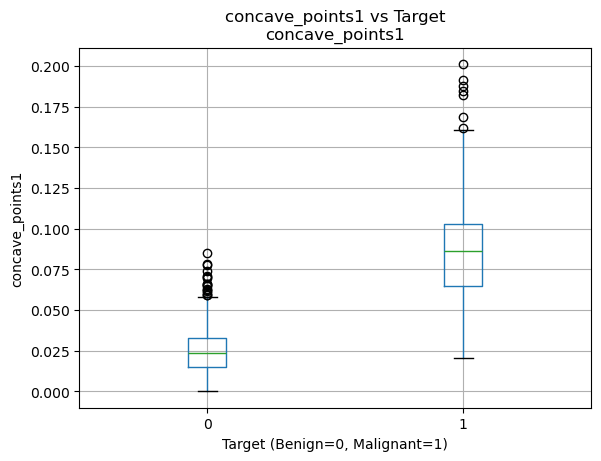

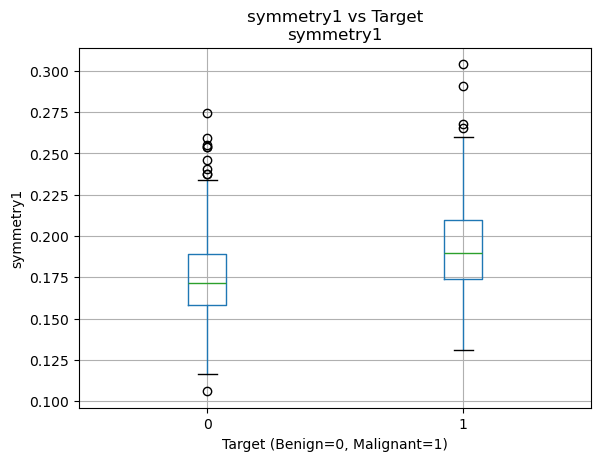

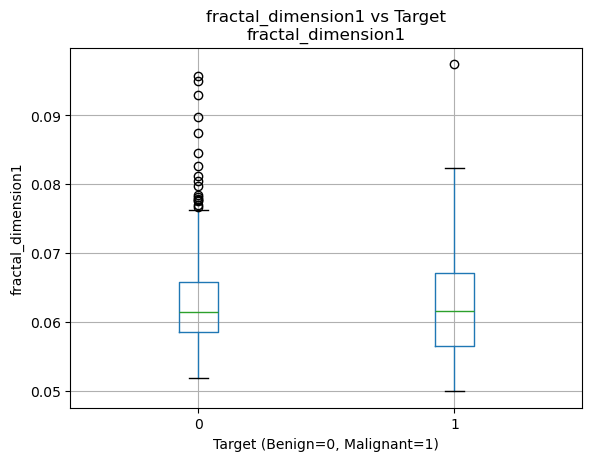

In [197]:
# Box plots of input column vs target column (first 10 columns):
for col in [c for c in breast_cancer.columns if c != "target"][:10]:
    breast_cancer.boxplot(column=col, by="target")
    plt.suptitle(f"{col} vs Target")
    plt.ylabel(f"{col}")
    plt.xlabel("Target (Benign=0, Malignant=1)")
    plt.show()

# Explanation of box plots (first 10 columns):
# The box plot of the second column, "radius1", shows that the malignant group has a higher median radius than the benign group.
# The box plot of the third column, "texture1", indicates that the texture values are more spread out for the malignant group.
# The box plot of the fourth column, "perimeter1", reveals that the malignant group has a larger perimeter on average.
# The box plot of the fifth column, "area1", shows that the area is generally larger for malignant tumors.
# The box plot of the sixth column, "smoothness1", indicates that the malignant group has a lower smoothness value.
# The box plot of the seventh column, "compactness1", shows that the malignant group has a higher compactness value.
# The box plot of the eighth column, "concavity1", indicates that the malignant group has a higher concavity value.
# The box plot of the ninth column, "concave_points1", shows that the malignant group has more concave points.
# The box plot of the tenth column, "symmetry1", indicates that the malignant group has lower symmetry values.
# Lastly, the box plot of the eleventh column, "fractal_dimension1", shows that the malignant group has a slightly higher fractal dimension on average.

# Code Alternative - Additional plots can be created using scatter plots
# Scatter plots of input column vs target column (first 10 columns):
#for col in [c for c in breast_cancer.columns if c != "target"][:10]:
    #plt.scatter(breast_cancer[col], breast_cancer["target"], alpha=0.5)
    #plt.suptitle(f"{col} vs target")
    #plt.show()


YOUR ANSWERS HERE

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

Mean Squared Error (MSE):
 0.05275500443051911
Range of Predictions:
 -0.4229951618758234 1.5630273281528022
Range of Actual Outcomes:
 0 1


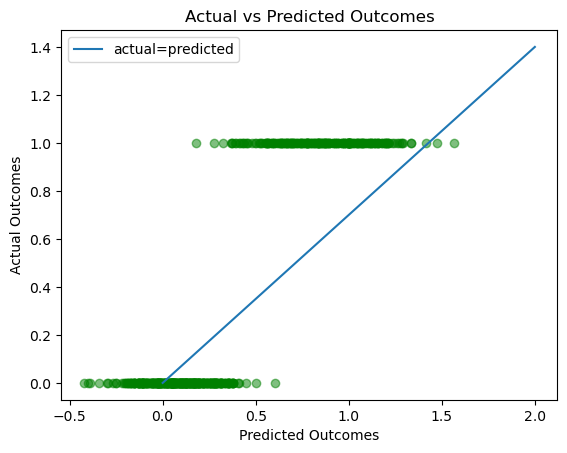

In [201]:
# Separate input columns and target column
breast_cancer_inputs = breast_cancer.drop(columns=["target"])
breast_cancer_target = breast_cancer["target"]

# Create model using linear regression
linear_model = sklearn.linear_model.LinearRegression()
linear_model

# Fit model based on breast cancer data
linear_model.fit(breast_cancer_inputs, breast_cancer_target)

# Predict target values using model
linear_predictions = linear_model.predict(breast_cancer_inputs)
linear_predictions

# Compute Mean Squared Error (MSE) to evaluate model performance
mean_squared_error = sklearn.metrics.mean_squared_error(breast_cancer_target, linear_predictions)
print("Mean Squared Error (MSE):\n", mean_squared_error)

# Check range of predictions from model
print("Range of Predictions:\n", linear_predictions.min(), linear_predictions.max())

# Check actual range of target value
print("Range of Actual Outcomes:\n", breast_cancer_target.min(), breast_cancer_target.max())

# Plot actual target values vs predicted values
plt.plot([0, 2], [0, 1.4], label="actual=predicted")
plt.scatter(linear_predictions, breast_cancer_target, color="green", alpha=0.5)

# Create labels and title
plt.legend()
plt.title("Actual vs Predicted Outcomes")
plt.xlabel("Predicted Outcomes")
plt.ylabel("Actual Outcomes")
plt.show()


YOUR ANSWERS HERE

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


In [ ]:
# Separate input columns and target column
breast_cancer_inputs = breast_cancer.drop(columns=["target"])
breast_cancer_target = breast_cancer["target"]

# Iterate through each column 
results = []
for col in breast_cancer_inputs.columns:
    breast_cancer_input = breast_cancer_inputs[col].values.reshape(-1,1)
    # Build linear regression model
    linear_model = sklearn.linear_model.LinearRegression()
    linear_model.fit(breast_cancer_input, breast_cancer_target)
    linear_predictions = linear_model.predict(breast_cancer_input)
    # Calculate MSE and R2 for each column model
    mean_squared_error =  sklearn.metrics.mean_squared_error(breast_cancer_target, linear_predictions)
    r2 =  sklearn.metrics.r2_score(breast_cancer_target, linear_predictions)
    results.append((col, mean_squared_error, r2))

# Sort by Mean Squared Error (MSE) and R^2
results_sorted = sorted(results, key=lambda t: t[1])
for i, (col, mean_squared_error, r2) in enumerate(results_sorted[:5], start=1):
    print(f"{i}. {col}: MSE={mean_squared_error:}, R2={r2:}")

# Print best overall
best = results_sorted[0]
print('\nBest single-column linear model:')
print(f"Column: {best[0]}, MSE={best[1]:}, R2={best[2]:}")

1. concave_points3: MSE=0.08655219828445855, R2=0.6297470235614584
2. perimeter3: MSE=0.09047769226811911, R2=0.612954546186532
3. concave_points1: MSE=0.09277454816052517, R2=0.6031290565112866
4. radius3: MSE=0.09283265892504021, R2=0.6028804702945147
5. perimeter1: MSE=0.10484185587095021, R2=0.5515075300111687

Best single-column linear model:
Column: concave_points3, MSE=0.08655219828445855, R2=0.6297470235614584


Mean Squared Error (MSE):
 0.08655219828445855
R^2 Score:
 0.6297470235614584
Range of Predictions:
 -0.2969678842276955 1.403109489330487
Range of Actual Outcomes:
 0 1


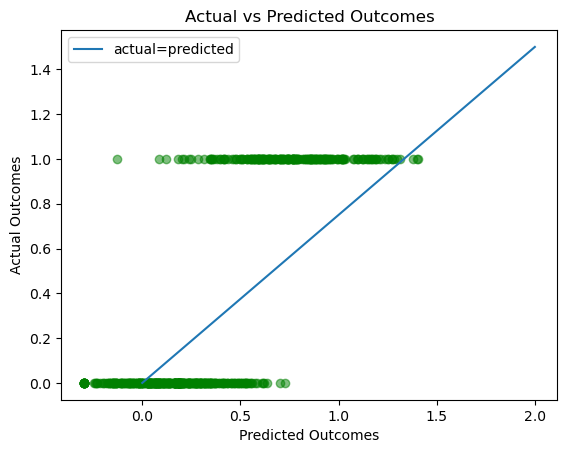

In [260]:
# Separate 1 input column and target column 
breast_cancer_input = breast_cancer["concave_points3"].values.reshape(-1, 1)
breast_cancer_target = breast_cancer["target"]

# Create model using linear regression
linear_model = sklearn.linear_model.LinearRegression()
linear_model

# Fit model based on breast cancer data
linear_model.fit(breast_cancer_input, breast_cancer_target)

# Predict target values using model
linear_predictions = linear_model.predict(breast_cancer_input)
linear_predictions

# Compute Mean Squared Error (MSE) 
mean_squared_error = sklearn.metrics.mean_squared_error(breast_cancer_target, linear_predictions)
print("Mean Squared Error (MSE):\n", mean_squared_error)

# compute R^2 score to check model quality
r2_score = linear_model.score(breast_cancer_input, breast_cancer_target)
print("R^2 Score:\n", r2_score)

# Check range of predictions from model
print("Range of Predictions:\n", linear_predictions.min(), linear_predictions.max())

# Check actual range of target value
print("Range of Actual Outcomes:\n", breast_cancer_target.min(), breast_cancer_target.max())

# Plot actual target values vs predicted values
plt.plot([0, 2], [0, 1.5], label="actual=predicted")
plt.scatter(linear_predictions, breast_cancer_target, color="green", alpha=0.5)

# Create labels and title
plt.legend()
plt.title("Actual vs Predicted Outcomes")
plt.xlabel("Predicted Outcomes")
plt.ylabel("Actual Outcomes")
plt.show()


In [261]:
# Therefore, based on the Mean Squared Error (MSE) and R^2 score, the input column that gives the best linear model of the target is the "concave_points3" feature.
# With a Mean Squared Error (MSE) of approximately 0.0865 and an R^2 value of approximately 0.628, this indicates that when using a linear regression model, the "concave_points3" feature is the most predictive of the target variable (among all other individual features) in the Wisconsin breast cancer dataset.

YOUR ANSWERS HERE

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

In [12]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

In [ ]:
# standardize dataset for PCA

YOUR ANSWERS HERE

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

In [14]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

In [15]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

YOUR ANSWER HERE